In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd /content/gdrive/My Drive/Colab Notebooks/Linear Regression/

/content/gdrive/My Drive/Colab Notebooks/Linear Regression


# New Section

In [3]:
ls


'Copy_of_Linear_Regression_(1).ipynb'   insurance.csv
 house.csv                              Predicting_prices_of_house.ipynb


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [5]:
#import data set
dataset= pd.read_csv('house.csv')
X= dataset.iloc[:,:-1].values
Y= dataset.iloc[:,1].values


In [6]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size= 1/3)

#Fitting Simple Linear Regression ipynb
#This is called Model 
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

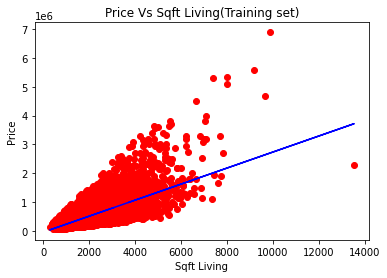

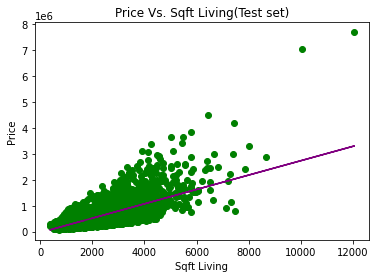

In [9]:
##Predicting the test results
Y_pred= regressor.predict(X_test)

#Visualising the training set Results

plt.scatter(X_train, Y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Price Vs Sqft Living(Training set)')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.show()
plt.scatter(X_test, Y_test, color='green')
plt.plot(X_test, regressor.predict(X_test), color='purple')
plt.title('Price Vs. Sqft Living(Test set)')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.show()

In [ ]:
print(regressor.predict([[1002]]))

[240200.25617846]


In [ ]:
a=int(input("What is the house area? "))
print('The Cost for this house is', regressor.predict([[a]]))

What is the house area? 2200
The Cost for this house is [573460.293724]


**Essentials of Linear Regression in Python**

The field of Data Science has progressed like nothing before. It incorporates so many different domains like Statistics, Linear Algebra, Machine Learning, Databases into its account and merges them in the most meaningful way possible. But, in its core, what makes this domain one of the craziest ones? - The powerful statistical algorithms

One such very primitive statistical algorithm is Linear Regression. Although it is very old, it is never too old to be neglected for a budding data scientist like you. Understanding the principle behind the working of linear regression is very important as to reason the evolution of a whole class of statistical algorithms called Generalized Linear Models. Moreover, it will also help you understand other aspects of a typical statistical/machine learning algorithm for example - cost functions, coefficients, optimization, etc.

As the title of this tutorial suggests, you will cover Linear Regression in details in this tutorial. Specifically, you will cover:

**Understanding a regression problem**
Coming up with a hypothesis for the regression problem
What is Linear Regression
Cost functions
Optimizing Linear Regression
Why it is still important to understand even in the world of neural networks
A case study in Python
Before diving deep into the theories behind Linear Regression let's have a clear view of the term regression.

**Understanding a regression problem:**
Regression belongs to the class of Supervised Learning tasks where the datasets that are used for predictive/statistical modeling contain continuous labels. But, let's define a regression problem more mathematically.

So, in the above image, X is the set of values that correspond to the living areas of various houses (also considered as the space of input values) and y is the price of the respective houses but note that these values are predicted by h. h is the function that maps the X values to y (often called as predictor). For historical reasons, this h is referred to as a hypothesis function. Keep in mind that, this dataset has only featured, i.e., the living areas of various houses and consider this to be a toy dataset for the sake of understanding.

Note that, the predicted values here are continuous in nature. So, your ultimate goal is, given a training set, to learn a function h:X→Y so that h(x) is a "good" predictor for the corresponding value of y. Also, keep in mind that the domain of values that both X and Y accept are all real numbers and you can define it like this: X=Y=IR where, IR is the set of all real numbers.

A pair (x(i), y(i)) is called a training example. You can define the training set as {(x(i), y(i)) ; i = 1,...,m} (in case the training set contains m instances and there is only one feature x in the dataset).

A bit of mathematics there for you so that you don't go wrong even in the simplest of things. So, according to Han, Kamber, and Pei-

"In general, these methods are used to predict the value of a response (dependent) variable from one or more predictor (independent) variables, where the variables are numeric." - Data Mining: Concepts and Techniques (3rd edn.)

As simple as that!

So, in the course of understanding a typical regression problem you also saw how to define a hypothesis for it as well. Brilliant going. You have set the mood just perfect! Now, you will straight dive into the mechanics of Linear Regression.

Linear Regression - how it works?
Before going into its details, won't it be good to take a look when it was discovered? Well, that goes way-way back to 18th Century. The mighty Carl Friedrich Gauss first proposed the most trivial form of statistical regression, but there are many arguments on this. Let's not get into those. But if you are interested to see the arguments that took place for this between Gauss and Adrien-Marie Legendre, this is the link to check out.

Linear regression is perhaps one of the most well known and well-understood algorithms in statistics and machine learning. Linear regression was developed in the field of statistics and is studied as a model for understanding the relationship between input and output numerical variables, but with the course of time, it has become an integral part of modern machine learning toolbox.

Let's have a toy dataset for it. You will use the same house price prediction dataset to investigate this but this time with two features. The task remains the same i.e., predicting the house price.

Source: Andrew Ng's lecture notes

As mentioned earlier, now the x’s are two-dimensional which means your dataset contains two features. For instance, x1(i) is the living area of the i-th house in the training set, and x2(i) is its number of bedrooms.

To perform regression, you must decide the way you are going to represent h. As an initial choice, let’s say you decide to approximate y as a linear function of x:

hθ(x) = θ0 + θ1x1 + θ2x2
Here, the θi’s are the parameters (also called weights) parameterizing the space of linear functions mapping from X to Y. In a simpler sense, these parameters are used for accurately mapping X to Y. But to keep things simple for your understanding, you will drop the θ subscript in hθ(x), and write it simply as h(x). To simplify your notation even further, you will also introduce the convention of letting x0 = 1 (this is the intercept term), so that



where on the right-hand side above you are considering θ and x both as vectors, and here n is the number of input instances (not counting x0).

But the main question that gets raised at this point is how do you pick or learn the parameters θ? You cannot change your input instances as to predict the prices. You have only these θ parameters to tune/adjust.

One prominent method seems to be to make h(x) close to y, at least for the training examples you have. To understand this more formally, let's try defining a function that determines, for each value of the θ’s, how close the h(x(i))’s are to the corresponding y(i) ’s. The function should look like the following:



Source: StackOverflow

To understand the reason behind taking the squared value instead of the absolute value, consider this squared-term as an advantage for the future operations to be performed for training the regression model. But if you want to dig deeper, help yourself.

You just saw one of the most important formulas in the world of Data Science/Machine Learning/Statistics. It is called as cost function.

This is an essential derivation because not only it gives birth to the next evolution of the linear regression (Ordinary Least Squares) but also formulates the foundations of a whole class of linear modeling algorithms (remember you came across a term called Generalized Linear Models).

It is important to note that, linear regression can often be divided into two basic forms:

Simple Linear Regression (SLR) which deals with just two variables (the one you saw at first)
Multi-linear Regression (MLR) which deals with more than two variables (the one you just saw)
These things are very straightforward but can often cause confusion.

You have already laid your foundations of linear regression. Now you will study more about the ways of estimating the parameters you saw in the above section. This estimation of parameters is essentially known as the training of linear regression. Now, there are many methods to train a linear regression model Ordinary Least Squares (OLS) being the most popular among them. So, it is good to refer a linear regression model trained using OLS as Ordinary Least Squares Linear Regression or just Least Squares Regression.

Note that the parameters here in this context are also called model coefficients.

Optimizing a linear regression model - various approaches:
Learning/training a linear regression model essentially means estimating the values of the coefficients/parameters used in the representation with the data you have.

In this section, you will take a brief look at some techniques to prepare a linear regression model.

Least squares' regression:
You left the previous section with a notion to choose θ so as to minimize J(θ). To do so, let’s use a search algorithm that starts with some "initial guess" for θ, and that iteratively changes θ to make J(θ) smaller, until hopefully, you converge to a value of θ that minimizes J(θ). Specifically, let’s consider the gradient descent algorithm, which starts with some initial θ, and repeatedly performs the update:

Source: Andrew Ng's lecture notes

(This update is simultaneously performed for all values of j = 0, . . . , n.) Here, α is called the learning rate. This is a very natural algorithm that repeatedly takes a step in the direction of steepest decrease of J. This term α effectively controls how steep your algorithm would move to the decrease of J. It can be pictorially expressed as the following:

Source: ml-cheatsheet

Intuitively speaking, the above formula denotes the small change that happens in J w.r.t the θj parameter and how it affects the initial value of θj. But look carefully, you have a partial derivative here to deal with. The whole derivation process is out of the scope of this tutorial.

Just note that for a single training example, this gives the update rule:

Source: ml-cheatsheet

The rule is called the LMS update rule (LMS stands for “least mean squares”) and is also known as the Widrow-Hoff learning rule.

Let's summarize a few things in the context of OLS.

"The Ordinary Least Squares procedure seeks to minimize the sum of the squared residuals. This means that given a regression line through the data we calculate the distance from each data point to the regression line, square it, and sum all of the squared errors together. This is the quantity that ordinary least squares seeks to minimize." - Jason Brownlee

Optimization with gradient descent:
In the previous training rule, you already got the notion of how gradient descent can be incorporated in this context. Essentially, gradient descent is a process of optimizing the values of the coefficients by iteratively minimizing the error of the model on your training data.

More briefly speaking, it works by starting with random values for each coefficient. The sum of the squared errors is calculated for each pair of input and output values. A learning rate is used as a scale factor, and the coefficients are updated in the direction towards minimizing the error. The process is repeated until a minimum sum squared error is achieved or no further improvement is possible.

The term α (learning rate) is very important here since it determines the size of the improvement step to take on each iteration of the procedure.

Now there are commonly two variants of gradient descent:

The method that looks at every example in the entire training set on every step and is called batch gradient descent.
The method where you repeatedly run through the training set, and each time you encounter a training example, you update the parameters according to the gradient of the error with respect to that single training example only. This algorithm is called stochastic gradient descent (also incremental gradient descent).
That is all for gradient descent for this tutorial. Now, you take a look at another way of optimizing a linear regression model, i.e. Regularization.

Regularization:
DataCamp already has a good introductory article on Regularization. You might want to check that out before proceeding with this one.

Generally, regularization methods work by penalizing the coefficients of features having extremely large values and thereby try to reduce the error. It not only results in an enhanced error rate but also, it reduces the model complexity. This is particularly very useful when you are dealing with a dataset that has a large number of features, and your baseline model is not able to distinguish between the importance of the features (not all features in a dataset are equally important, right?).

There are two variants of regularization procedures for linear regression are:

Lasso Regression: adds a penalty term which is equivalent to the absolute value of the magnitude of the coefficients (also called L1 regularization). The penalty terms look like:

where,

λ is the constant factor that you add in order to control the speed of the improvement in error (learning rate)
the dataset has (M+1) features, so it runs from 0 to M. wj is the weight/coefficient.
Ridge Regression: adds a penalty term which is equivalent to the square of the magnitude of coefficients (also called L2 regularization). The penalty terms look like:

Is it still worth the time to learn linear regression?
Is it not? You already saw how gracefully linear regression introduces some of the most critical concepts of Machine Learning such as cost functions, optimization, variable relationships and what not? All these things are vital even if you are constructing a neural network. The applicability may differ in some places, but the overall concepts remain precisely the same. So, without understanding these fundamental things, you will never be able to reason why your neural net is not performing well.

Moreover, a simple concept of deriving the relationships among variables gave birth to so many concepts and most importantly it created a whole new family of algorithms - Generalized Linear Models. So for aspiring Data Science/Machine Learning/Artificial Intelligence practitioner, this algorithm is something which cannot be neglected. You already have understood that by now!

No, you will implement a simple linear regression in Python for yourself now. It should be fun!

A case study in Python:
For this case study first, you will use the Statsmodel library for Python. It is a very popular library which provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. For the data, you will use the famous Boston House dataset. The mighty scikit-learn comes with this dataset, so you don't need to download it separately.

In [ ]:
import statsmodels.api as sm
from sklearn import datasets

data = datasets.load_boston()

In [ ]:
print (data.DESCR)

Now, before applying linear regression, you will have to prepare the data and segregate the features and the label of the dataset. MEDV (median home value) is the label in this case. You can access the features of the dataset using feature_names attribute.

A bit of pandas knowledge will come in handy here. This cheat sheet is a must-see if you are looking for ways to refresh basic pandas concepts.

In [ ]:
# Pandas and NumPy import
import numpy as np
import pandas as pd

# Set the features  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Set the target
target = pd.DataFrame(data.target, columns=["MEDV"])

At this point, you need to consider a few important things about linear regression before applying it to the data. You could have studied this earlier in this tutorial, but studying these factors at this particular point of time will help you get the real feel.

Linear Assumption: Linear regression is best employed to capture the relationship between the input variables and the outputs. In order to do so, linear regression assumes this relationship to be linear (which might not be the case all the time). But you can always transform your data so that a linear relationship is maintained. For example, if your data has an exponential relationship, you can apply log-transform to make the relationship linear.

Collinearity between the features: Collinearity is a measure to calculate the importance of a feature of a dataset mathematically. When you have a dataset in which the features are very correlated to each other, linear regression fails to approximate the relationship appropriately and tends to overfit. So, it is efficient to detect the highly correlated features and to drop them before you apply linear regression. If you want to know more about this, feel free to check this excellent Kaggle kernel.
Let's do some hands-on now. To keep things simple you will just take RM — the average number of rooms feature for now. Note that Statsmodels does not add a constant term (recall the factor θ0) by default. Let’s see it first without the constant term in your regression model:

X = df["RM"]

In [ ]:
X = df["RM"]
y = target["MEDV"]

# Fit and make the predictions by the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

What is this output! It is way too big to understand when you are seeing it for the first time. Let's go through the most critical points step by step:

The first observation you should make here is you are using OLS method to train your linear regression model.

There's a value corresponding to R-Squared. R-squared is the “percent of variance explained” by the model. That is, R-squared is the fraction by which the variance of the errors is less than the variance of the dependent variable. R-squared values range from 0 to 1 and are commonly stated as percentages from 0% to 100%. R-squared will give you an estimate of the relationship between movements of a dependent variable based on an independent variable's movements. It doesn't tell you whether your chosen model is good or bad, nor will it tell you whether the data and predictions are biased. A high or low R-square isn't necessarily good or bad, as it doesn't convey the reliability of the model, nor whether you've chosen the right regression. You can get a low R-squared for a good model, or a high R-square for a poorly fitted model, and vice versa.

The coefficient (coef) of 3.634 means that if the RM variable increases by 1, the predicted value of MEDV increases by 3.634.

There is a 95% confidence intervals for the RM which means that the model predicts at a 95% percent confidence that the value of RM is between 3.548 to 3.759).
These are the most important points you should take care of for the time being (and you can ignore the warning as well).

A constant term can easily be added to the linear regression model. You can do it by X = sm.add_constant(X) (X is the name of the dataframe containing the input (independent variables).

In [ ]:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

It can be clearly seen that the addition of the constant term has a direct effect on the coefficient term. Without the constant term, your model was passing through the origin, but now you have a y-intercept at -34.67. Now the slope of the RM predictor is also changed from 3.634 to 9.1021 (coef of RM).

Now you will fit a regression model with more than one variable — you will add LSTAT (percentage of lower status of the population) along with the RM variable. The model training (fitting) procedure remains the exact same as previous:

In [ ]:
X = df[["RM", "LSTAT"]]
y = target["MEDV"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

This model has a much higher R-squared value — 0.948, which essentially means that this model captures 94.8% of the variance in the dependent variable. Now, let's try to figure out the relationship between the two variables RM and LSTAT and median house value. As RM increases by 1, MEDV will increase by 4.9069, and when LSTAT increases by 1, MEDV will decrease by 0.6557. This indicates that RM and LSTAT are statistically significant in predicting (or estimating) the median house value.

You can interpret this relationship in plain English as well:

Houses having a small number of rooms are likely to have low price values.
In the areas where the status of the population, is lower the house prices are likely to be low.
Makes more sense now! Isn't it?

This was the example of both single and multiple linear regression in Statsmodels. Your homework will be to investigate and interpret the results with the further features.

Next, let's see how linear regression can be implemented using your very own scikit-learn. You already have the dataset imported, but you will have to import the linear_model class.

In [ ]:
from sklearn import linear_model

In [ ]:
X = df
y = target["MEDV"]

lm = linear_model.LinearRegression()
model = lm.fit(X,y)

The model training is completed. This sklearn implementation also uses OLS. Let's make some predictions of MEDV values for the first five samples.

In [ ]:
predictions = lm.predict(X)
print(predictions[0:5])

If you want to know some more details (such as the R-squared, coefficients, etc.) of your model, you can easily do so.

In [ ]:
lm.score(X,y)

In [ ]:
lm.coef_

Beautiful! You have made it to the end. Covering one of the simplest and the most fundamental algorithms was not that easy, but you did it pretty well. You not only got familiarized with simple linear regression but also studied many fundamental aspects, terms, factors of machine learning. You did an in-depth case study in Python as well.

This tutorial can also be treated as a motivation for you to implement Linear Regression from scratch. Following are the brief steps if anyone wants to do it for real:

Calculate the mean and variance of the data
Calculate covariance
Estimate coefficients
Make predictions
Following are some references that were used in order to prepare this tutorial:

Machine Learning course by Coursera (taught by the great Andrew Ng)
Implementing linear regression from scratch
The Elements of Statistical Learning
Simple and Multiple Linear Regression in Python by Adi Bronshtein